In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/422.5 kB ? eta -:--:--
   --------------------------------------  419.8/422.5 kB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.11 requires protobuf<4,>=3.11, but you have protobuf 4.23.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_path="D:\AICTE internship\dataset\TRAIN"
test_path="D:\AICTE internship\dataset\TEST"

In [5]:
#Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
# Load and preprocess the training data
x_data, y_data = [], []  # Lists to store image data and labels

In [9]:
for category in glob(train_path+'/*'):
     for file in tqdm(glob(category+'/*')): 
        img = cv2.imread(file) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_data.append(img) 
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [03:19<00:00, 50.02it/s]


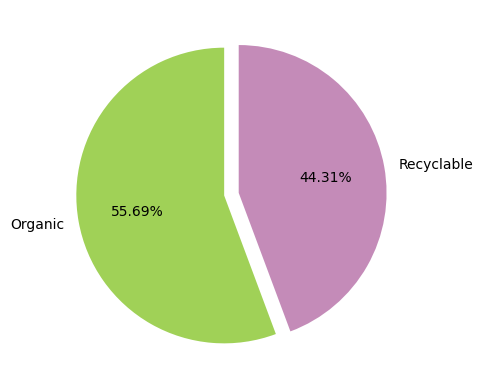

In [ ]:
#Visualization
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors,startangle=90, explode=[0.05,0.05])
plt.show()

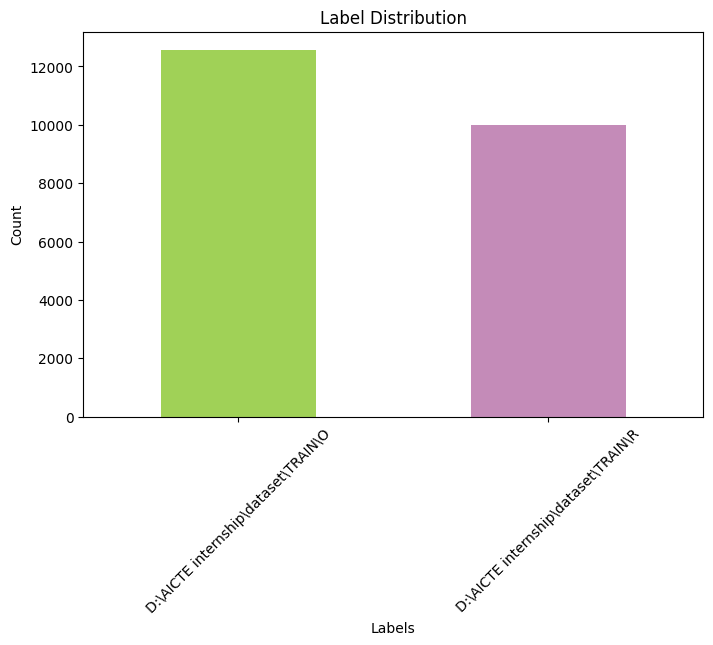

In [11]:
# Visualize the distribution of labels using a bar chart
plt.figure(figsize=(8, 5))  # Set figure size
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title("Label Distribution")  # Add title
plt.xlabel("Labels")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

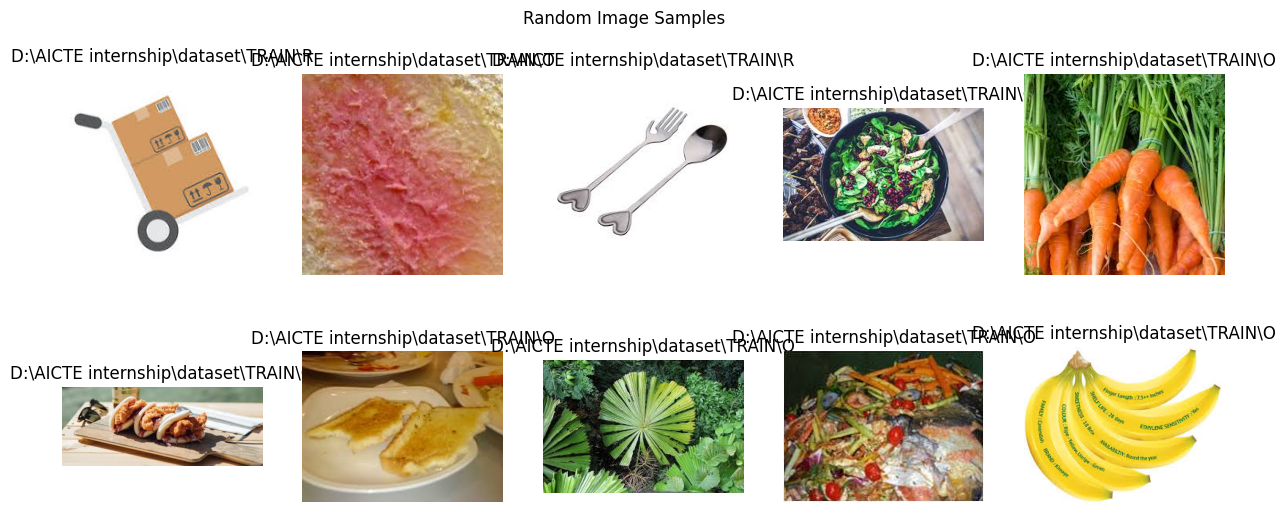

In [12]:
# Display a few random image samples from the dataset with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    random_idx = np.random.randint(len(data))
    ax.imshow(data.iloc[random_idx].image)
    ax.set_title(data.iloc[random_idx].label)
    ax.axis('off')  # Remove axis for better visualization
plt.suptitle("Random Image Samples")  # Add a title for the entire figure
plt.show()